### Import Dependencies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Processing

In [10]:
df = pd.read_csv('data/processed/1.1_initial_data_assessment_done.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_cols.remove('Churn')
target_col = 'Churn'

In [13]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Analyzing Numerical Features

#### Distribution Analysis

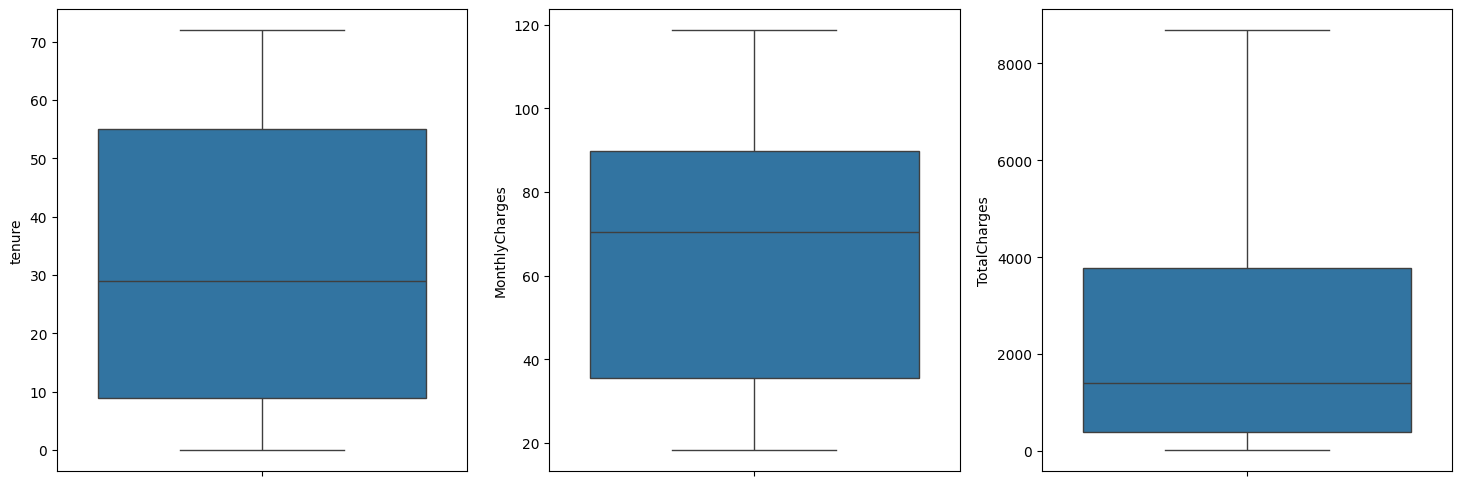

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.boxplot(data=df['tenure'], ax=axes[0])
sns.boxplot(data=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])


plt.show()

#### Outlier Detection using IQR

In [20]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR

    return (data < lowerbound) | (data > upperbound)

for col in numerical_cols:
    n_outliers = find_anomaly(df[col])
    print(f'Number of outlier in {col}: {n_outliers.sum()}')

Number of outlier in tenure: 0
Number of outlier in MonthlyCharges: 0
Number of outlier in TotalCharges: 0


#### Outlier Detection using Z-Score

In [21]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()
    upperbound = mean + 3*std
    lowerbound = mean - 3*std

    return (data < lowerbound) | (data > upperbound)

for col in numerical_cols:
    n_outliers = find_anomaly(df[col])
    print(f'Number of outlier in {col}: {n_outliers.sum()}')

Number of outlier in tenure: 0
Number of outlier in MonthlyCharges: 0
Number of outlier in TotalCharges: 0


### Analyzing Categorical Features

#### Frequency Analysis

In [26]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

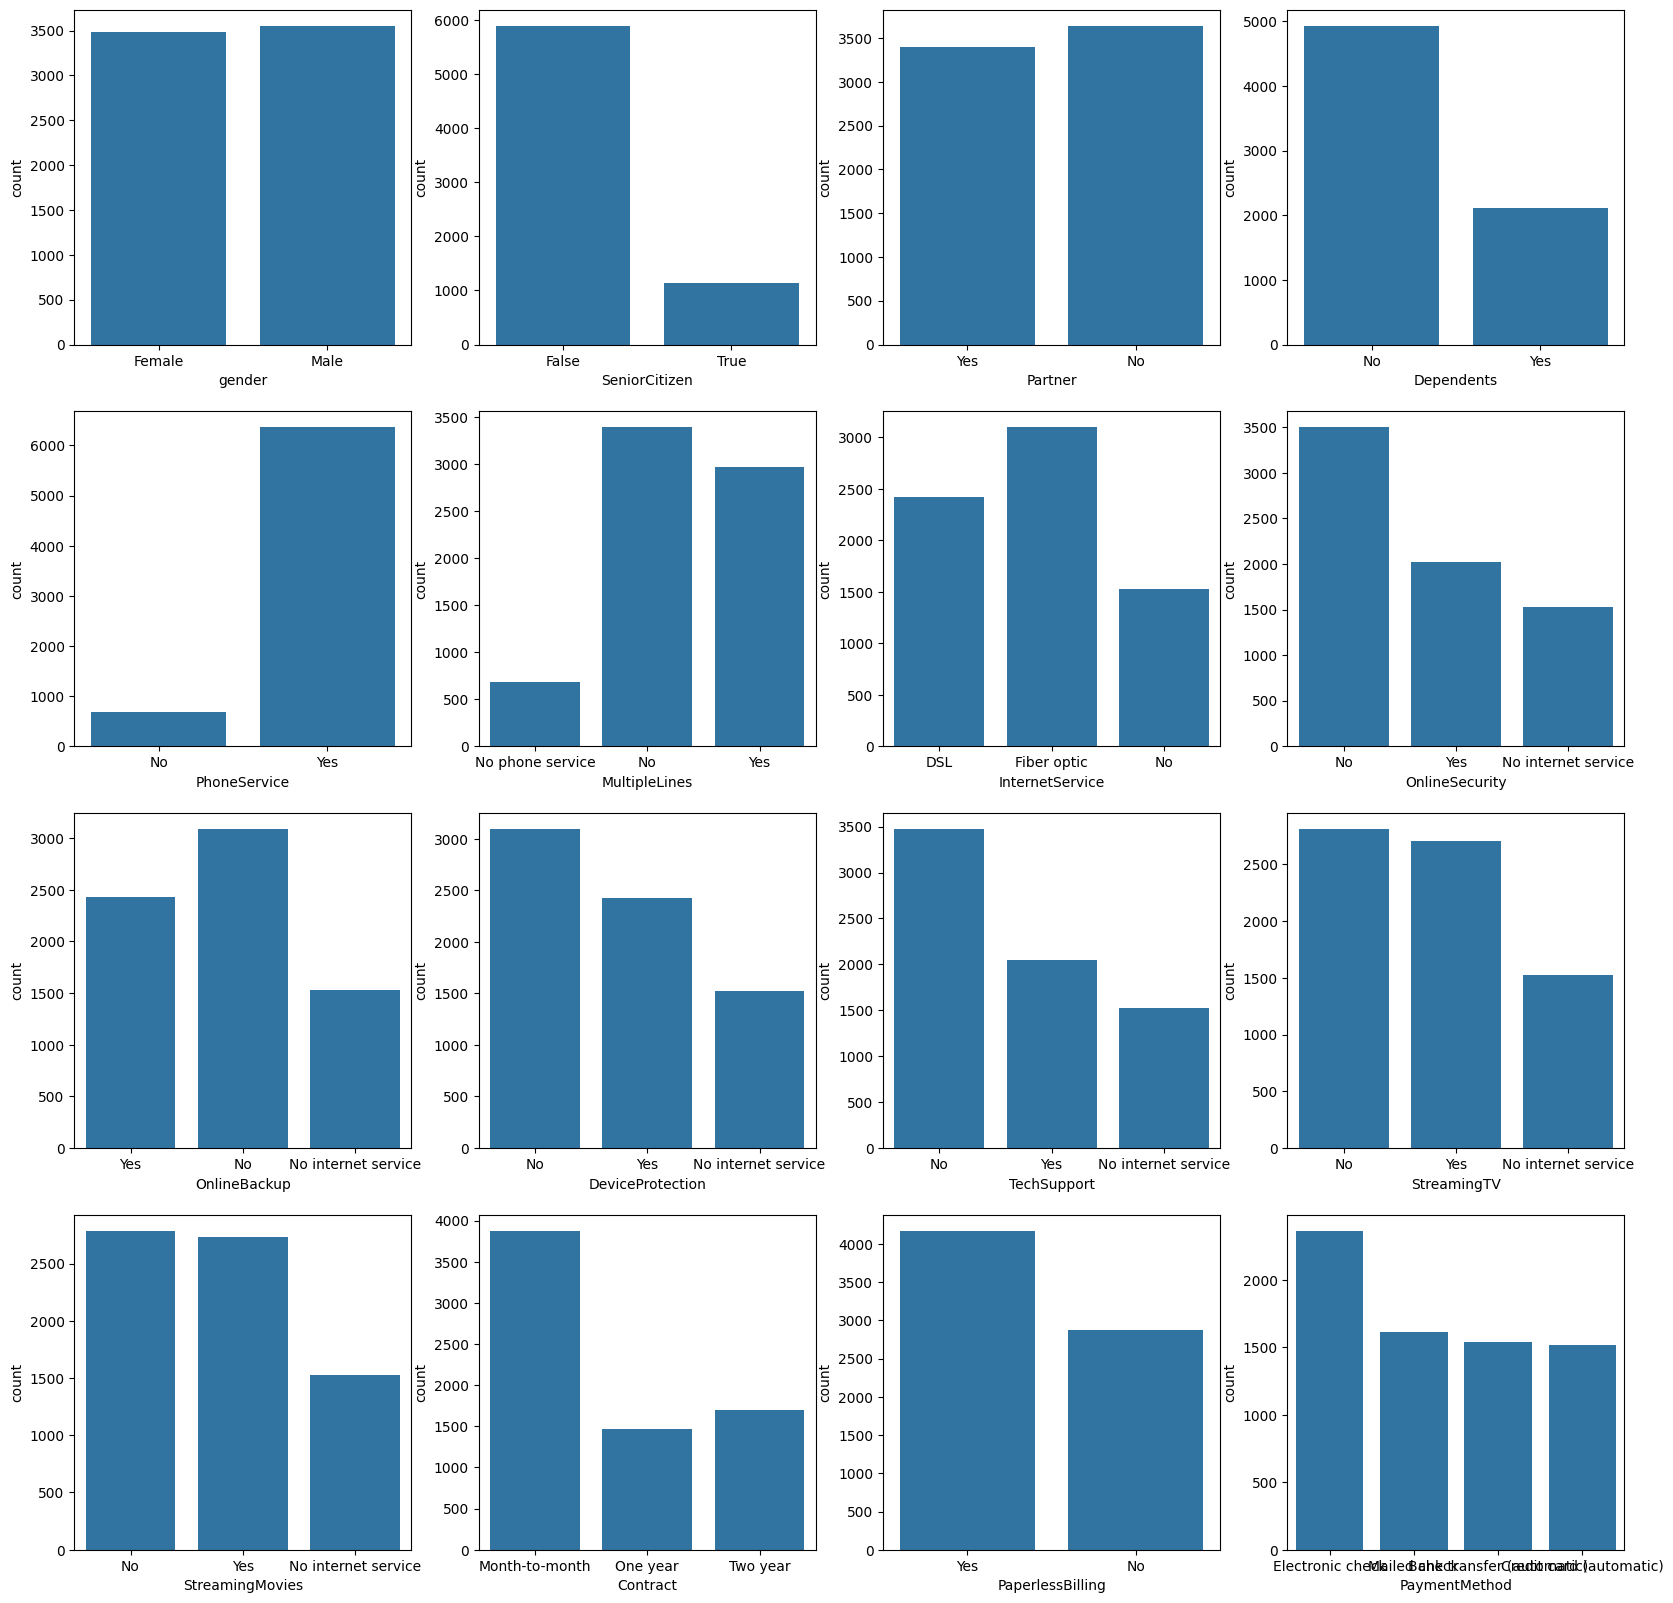

In [27]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for col in categorical_cols:
    sns.countplot(data=df, x=col, ax=axes[categorical_cols.index(col)//4, categorical_cols.index(col)%4])

#### Relationship with Churn

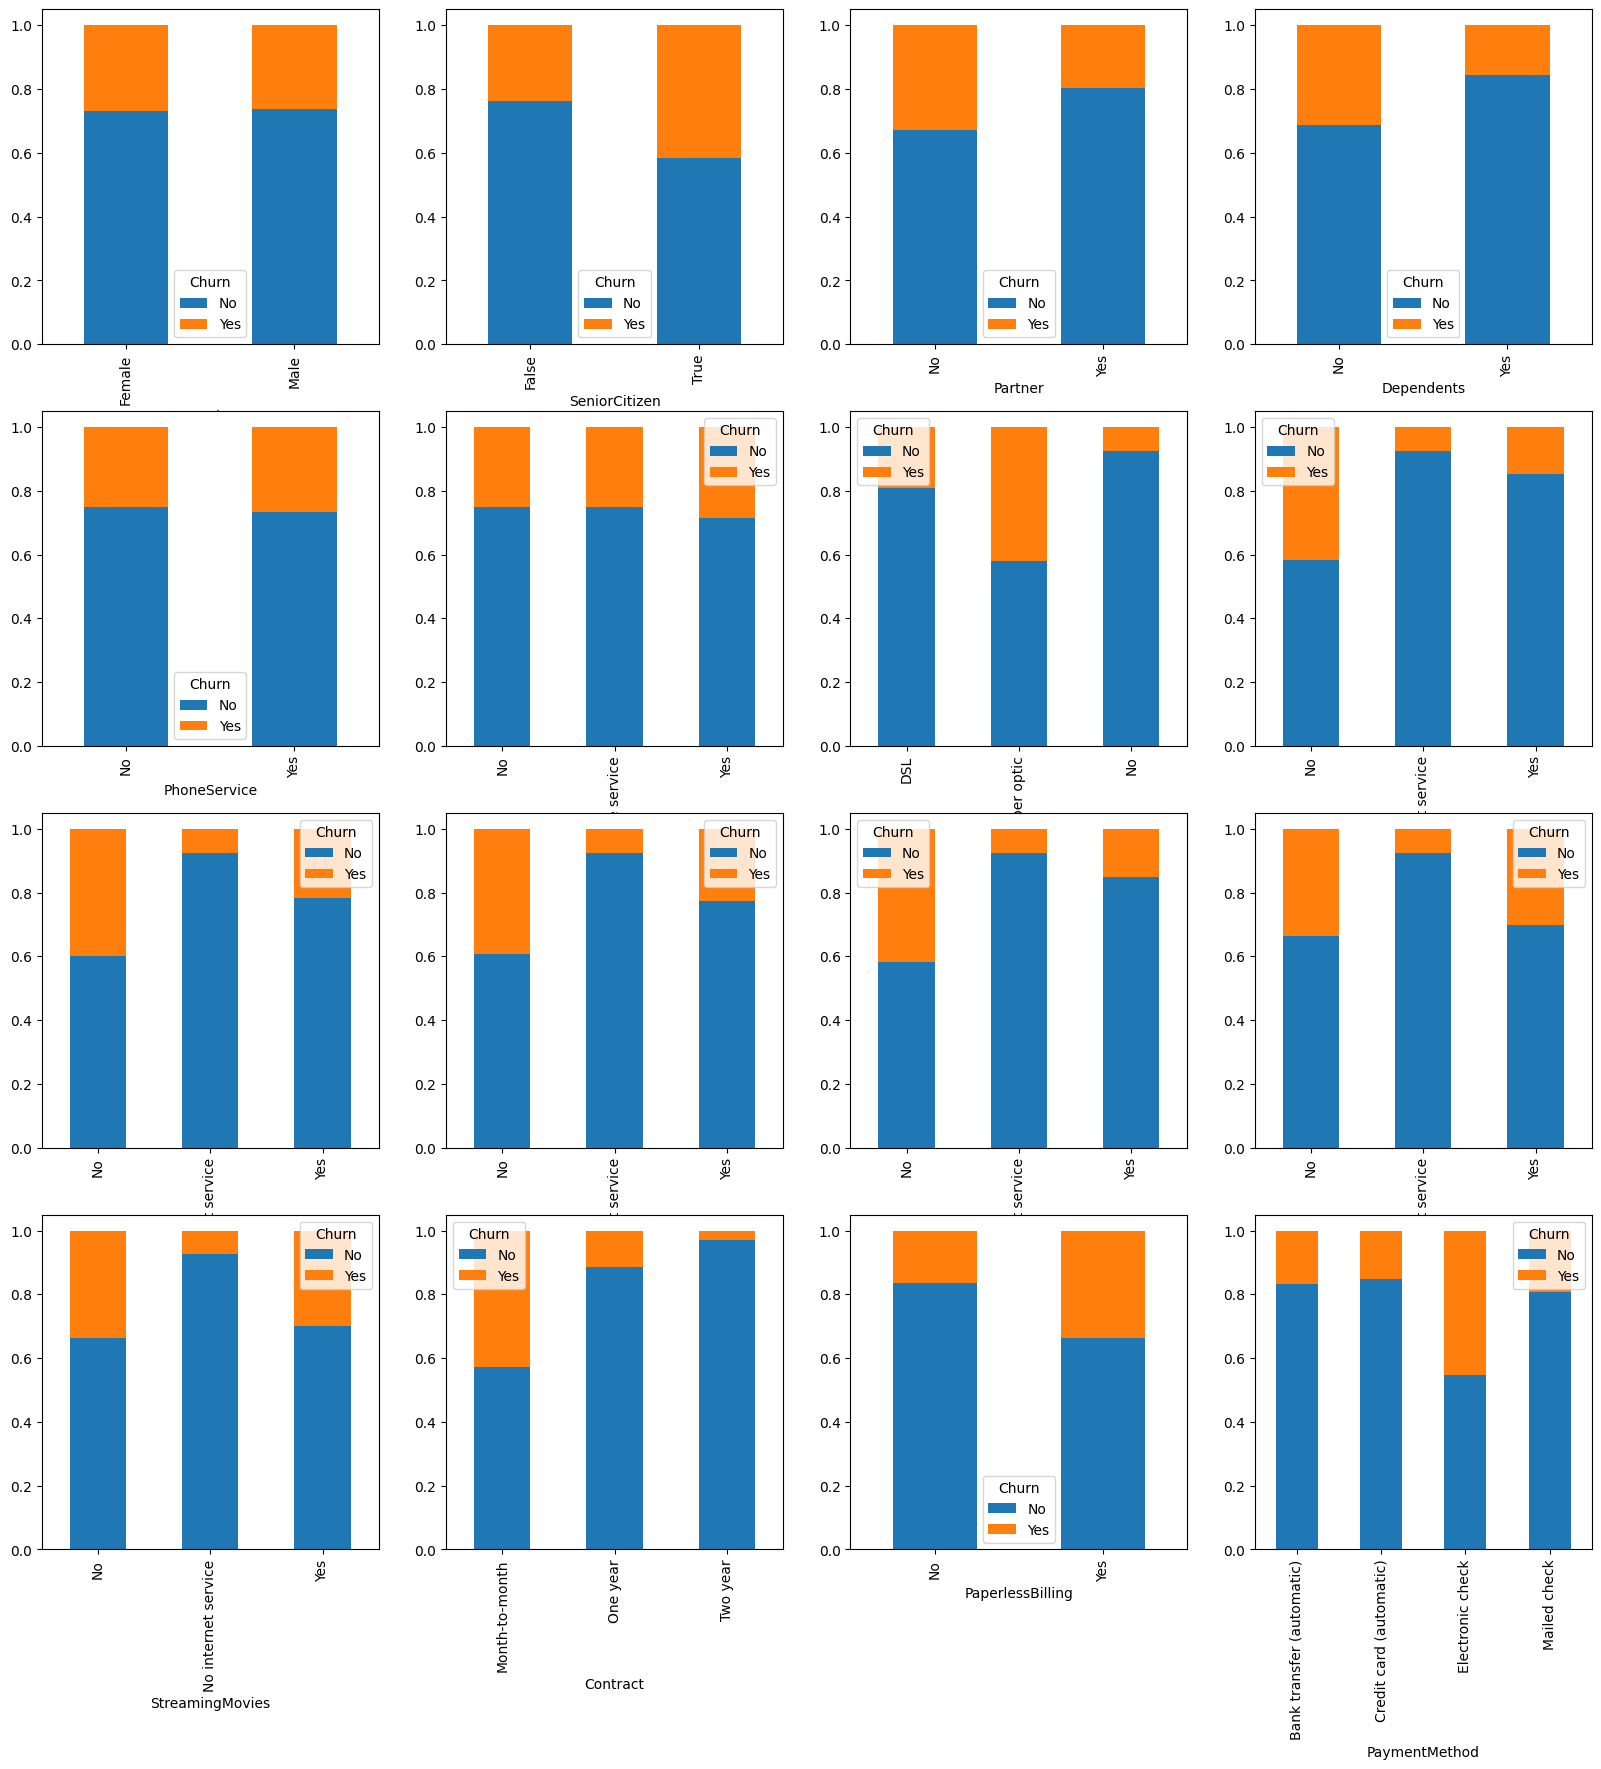

In [29]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for col in categorical_cols:
    grouped_data = df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0)
    grouped_data.plot(kind='bar', stacked=True, ax=axes[categorical_cols.index(col)//4, categorical_cols.index(col)%4])

### Feature Engineering Opportunities

- Binning tenure into 3 bins: New (0-12 months), Established(13-48 months), Loyal (49+ months)
- Service Adoption Score: Count how many services a customer has
- High/Low Charge Groups: Segment MonthlyCharges into bins (Low, Medium, High)
- Average Monthly Spend per Service: MonthlyCharges / Number of services
- Payment Reliability Indicator: Categories (Automatic, Manual)